In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)

Numpy Version: 1.21.6
Pandas Version: 1.3.5
Seaborn Version: 0.11.2


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
df= pd.read_csv('/content/drive/My Drive/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')

In [ ]:
df = pd.read_csv('marketing_campaign_data.csv')

FileNotFoundError: ignored

In [6]:
df

Unnamed: 0     ID  Year_Birth Education Marital_Status      Income  \
0              0   5524        1957        S1         Lajang  58138000.0   
1              1   2174        1954        S1         Lajang  46344000.0   
2              2   4141        1965        S1    Bertunangan  71613000.0   
3              3   6182        1984        S1    Bertunangan  26646000.0   
4              4   5324        1981        S3        Menikah  58293000.0   
...          ...    ...         ...       ...            ...         ...   
2235        2235  10870        1967        S1        Menikah  61223000.0   
2236        2236   4001        1946        S3    Bertunangan  64014000.0   
2237        2237   7270        1981        S1          Cerai  56981000.0   
2238        2238   8235        1956        S2    Bertunangan  69245000.0   
2239        2239   9405        1954        S3        Menikah  52869000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
0           0         0  04-09-2012       58  ...                  7   
1           1         1  08-03-2014       38  ...                  5   
2           0         0  21-08-2013       26  ...                  4   
3           1         0  10-02-2014       26  ...                  6   
4           1         0  19-01-2014       94  ...                  5   
...       ...       ...         ...      ...  ...                ...   
2235        0         1  13-06-2013       46  ...                  5   
2236        2         1  10-06-2014       56  ...                  7   
2237        0         0  25-01-2014       91  ...                  6   
2238        0         1  24-01-2014        8  ...                  3   
2239        1         1  15-10-2012       40  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 30 columns]

In [7]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [10]:
df['Year_Birth'].min()

1893

In [11]:
df.sample(5)

Unnamed: 0     ID  Year_Birth Education Marital_Status      Income  \
1576        1576   2130        1982        S1    Bertunangan  45203000.0   
1599        1599   7943        1975        S3        Menikah  36663000.0   
546          546  10955        1964        S1          Janda  85620000.0   
1693        1693  10398        1981        D3         Lajang  24336000.0   
595          595   4992        1975        S2    Bertunangan  17459000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  \
1576        2         0  23-03-2014        4  ...                  6   
1599        1         0  25-04-2014       40  ...                  2   
546         0         0  07-01-2014       68  ...                  1   
1693        1         0  27-08-2012       82  ...                  7   
595         1         0  19-09-2013       12  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1576             0             0             0             0             0   
1599             0             0             0             0             0   
546              0             0             0             0             0   
1693             0             0             0             0             0   
595              0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
1576         0              3         11         1  
1599         0              3         11         0  
546          0              3         11         1  
1693         0              3         11         0  
595          0              3         11         1  

[5 rows x 30 columns]

In [12]:
df['Conversion_rate'] = df['Response']/df['NumWebVisitsMonth']

In [13]:
df['Conversion_rate'].sample(5)

814     0.0
120     0.0
691     0.0
1737    0.0
504     0.0
Name: Conversion_rate, dtype: float64

In [14]:
from datetime import datetime
sekarang=datetime.now()
df['umur']=sekarang.year-df['Year_Birth']

In [15]:
df['umur'].value_counts()

46     89
51     87
47     83
50     79
44     77
52     77
49     74
57     74
53     71
48     69
66     55
64     53
43     53
70     52
45     52
54     51
63     51
56     50
68     50
67     49
62     49
40     45
59     45
55     44
60     44
65     43
71     43
39     42
36     42
58     42
42     39
41     39
38     38
61     36
69     35
37     32
33     30
73     30
72     29
34     29
35     27
74     21
32     18
76     16
75     16
31     15
30     13
77      8
79      7
78      7
29      5
27      5
28      3
26      2
123     1
81      1
129     1
122     1
82      1
Name: umur, dtype: int64

In [16]:
df['umur'].min()

26

In [17]:
df['umur'].max()

129

In [18]:
df['kategori_umur']=np.where(df['umur']<=44, 'Pemuda', np.where(df['umur']<=64, 'Dewasa','Usia Lanjut'))

In [19]:
df['kategori_umur']

0       Usia Lanjut
1       Usia Lanjut
2            Dewasa
3            Pemuda
4            Pemuda
           ...     
2235         Dewasa
2236    Usia Lanjut
2237         Pemuda
2238    Usia Lanjut
2239    Usia Lanjut
Name: kategori_umur, Length: 2240, dtype: object

In [20]:
df.sample(5)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
2117        2117  8659        1952        S3    Bertunangan  69805000.0   
2025        2025  9423        1979        S2        Menikah  32765000.0   
713          713  1044        1953        S1    Bertunangan  58398000.0   
878          878  1446        1956        S2         Lajang  86424000.0   
670          670  9153        1964        S3        Menikah  59304000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  AcceptedCmp5  AcceptedCmp1  \
2117        0         1  21-01-2014       50  ...             0             0   
2025        1         0  23-02-2014       49  ...             0             0   
713         0         0  14-05-2013       44  ...             0             0   
878         0         0  05-04-2014       12  ...             0             0   
670         0         1  29-07-2013       81  ...             0             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
2117             0         0              3         11         0   
2025             0         0              3         11         0   
713              0         0              3         11         0   
878              0         0              3         11         0   
670              0         0              3         11         0   

      Conversion_rate  umur  kategori_umur  
2117              0.0    70    Usia Lanjut  
2025              0.0    43         Pemuda  
713               0.0    69    Usia Lanjut  
878               0.0    66    Usia Lanjut  
670               0.0    58         Dewasa  

[5 rows x 33 columns]

In [21]:
df['Dt_Customer_date']=pd.to_datetime(df['Dt_Customer'])

In [22]:
df['Dt_Customer_year']=df['Dt_Customer_date'].dt.year

In [23]:
df.sample(5)

Unnamed: 0     ID  Year_Birth Education Marital_Status      Income  \
1518        1518  10380        1972        S2        Menikah  37787000.0   
1437        1437   2518        1986        D3    Bertunangan  20491000.0   
241          241   9940        1958        S1    Bertunangan  64961000.0   
825          825   5989        1959        D3          Cerai  78353000.0   
516          516  11025        1961        S1        Menikah  36443000.0   

      Kidhome  Teenhome Dt_Customer  Recency  ...  AcceptedCmp2  Complain  \
1518        1         0  20-09-2013       50  ...             0         0   
1437        0         0  25-01-2013       16  ...             0         0   
241         0         1  23-12-2012       97  ...             0         0   
825         0         1  16-04-2013       51  ...             0         0   
516         1         1  03-02-2013        9  ...             0         0   

      Z_CostContact  Z_Revenue  Response  Conversion_rate  umur  \
1518              3         11         0              0.0    50   
1437              3         11         0              0.0    36   
241               3         11         0              0.0    64   
825               3         11         0              0.0    63   
516               3         11         0              0.0    61   

      kategori_umur  Dt_Customer_date  Dt_Customer_year  
1518         Dewasa        2013-09-20              2013  
1437         Pemuda        2013-01-25              2013  
241          Dewasa        2012-12-23              2012  
825          Dewasa        2013-04-16              2013  
516          Dewasa        2013-03-02              2013  

[5 rows x 35 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [25]:
nums = ['Year_Birth','Income','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response','Conversion_rate','umur']
cats = ['Education','Marital_Status','kategori_umur','Kidhome','Teenhome','Dt_Customer_year','Complain']

In [26]:
df[nums].describe()

Year_Birth        Income      Recency       MntCoke      MntFruits  \
count  2240.000000  2.216000e+03  2240.000000  2.240000e+03    2240.000000   
mean   1968.805804  5.224725e+07    49.109375  3.039357e+05   26302.232143   
std      11.984069  2.517308e+07    28.962453  3.365974e+05   39773.433765   
min    1893.000000  1.730000e+06     0.000000  0.000000e+00       0.000000   
25%    1959.000000  3.530300e+07    24.000000  2.375000e+04    1000.000000   
50%    1970.000000  5.138150e+07    49.000000  1.735000e+05    8000.000000   
75%    1977.000000  6.852200e+07    74.000000  5.042500e+05   33000.000000   
max    1996.000000  6.666660e+08    99.000000  1.493000e+06  199000.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts   MntGoldProds  \
count     2.240000e+03      2240.000000       2240.000000    2240.000000   
mean      1.669500e+05     37525.446429      27062.946429   44021.875000   
std       2.257154e+05     54628.979403      41280.498488   52167.438915   
min       0.000000e+00         0.000000          0.000000       0.000000   
25%       1.600000e+04      3000.000000       1000.000000    9000.000000   
50%       6.700000e+04     12000.000000       8000.000000   24000.000000   
75%       2.320000e+05     50000.000000      33000.000000   56000.000000   
max       1.725000e+06    259000.000000     263000.000000  362000.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
std             1.932238         2.778714             2.923101   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth     Response  Conversion_rate  \
count        2240.000000        2240.000000  2240.000000      2229.000000   
mean            5.790179           5.316518     0.149107         0.043686   
std             3.250958           2.426645     0.356274         0.142981   
min             0.000000           0.000000     0.000000         0.000000   
25%             3.000000           3.000000     0.000000         0.000000   
50%             5.000000           6.000000     0.000000         0.000000   
75%             8.000000           7.000000     0.000000         0.000000   
max            13.000000          20.000000     1.000000         1.000000   

              umur  
count  2240.000000  
mean     53.194196  
std      11.984069  
min      26.000000  
25%      45.000000  
50%      52.000000  
75%      63.000000  
max     129.000000

In [27]:
df_cats = df[cats].astype('category').copy()

In [28]:
df_cats.describe()

Education Marital_Status kategori_umur  Kidhome  Teenhome  \
count       2240           2240          2240     2240      2240   
unique         5              6             3        3         3   
top           S1        Menikah        Dewasa        0         0   
freq        1127            864          1220     1293      1158   

        Dt_Customer_year  Complain  
count               2240      2240  
unique                 3         2  
top                 2013         0  
freq                1189      2219

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [30]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value count kolom kategori_umur:
Dewasa         1220
Pemuda          554
Usia Lanjut     466
Name: kategori_umur, dtype: int64

Value count kolom Kidhome:
0    1293
1     899
2      48
Name: Kidhome, dtype: int64

Value count kolom Teenhome:
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

Value count kolom Dt_Customer_year:
2013    1189
2014     557
2012     494
Name: Dt_Customer_year, dtype: int64

Value count kolom Complain:
0    2219
1      21
Name: Complain, dtype: int64



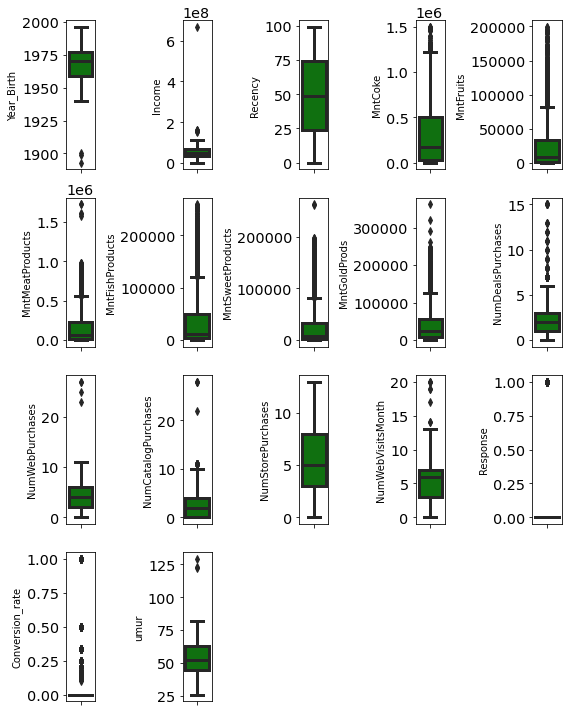

In [31]:
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

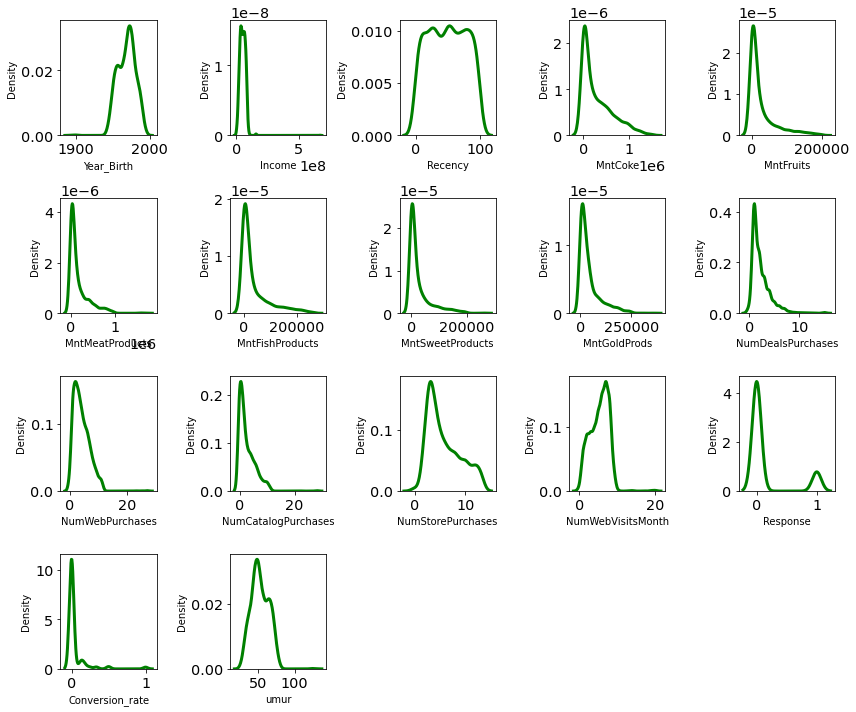

In [32]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

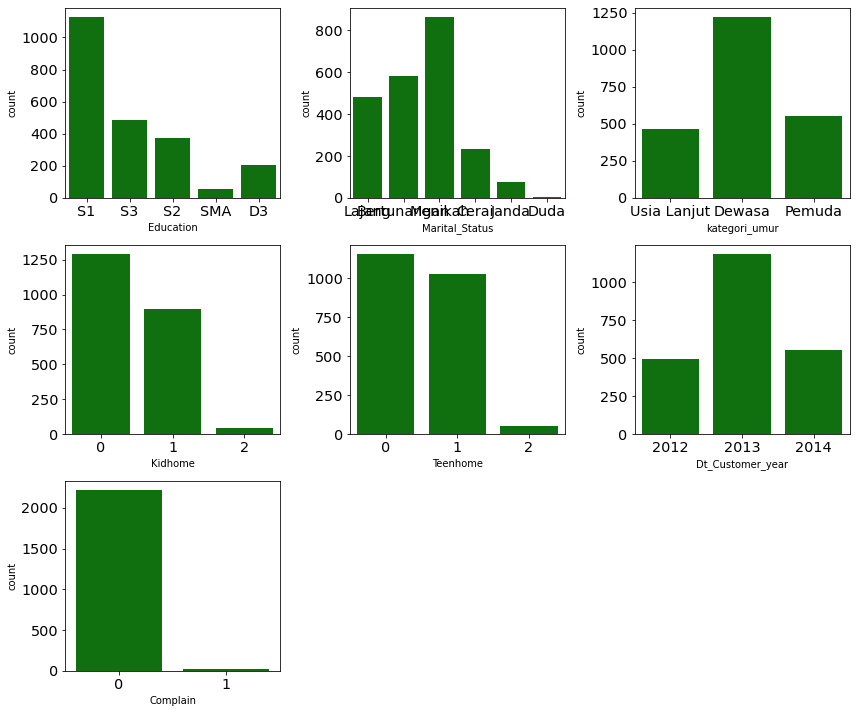

In [33]:
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

In [34]:
df.corr()

Unnamed: 0        ID  Year_Birth    Income   Kidhome  \
Unnamed: 0             1.000000 -0.006971    0.005586  0.014894 -0.023251   
ID                    -0.006971  1.000000    0.000028  0.013095  0.002406   
Year_Birth             0.005586  0.000028    1.000000 -0.161791  0.230176   
Income                 0.014894  0.013095   -0.161791  1.000000 -0.428669   
Kidhome               -0.023251  0.002406    0.230176 -0.428669  1.000000   
Teenhome               0.036062 -0.002580   -0.352111  0.019133 -0.036133   
Recency                0.000004 -0.046524   -0.019871 -0.003970  0.008827   
MntCoke                0.001366 -0.022878   -0.157773  0.578650 -0.496297   
MntFruits              0.024295  0.004600   -0.017917  0.430842 -0.372581   
MntMeatProducts        0.000679 -0.004437   -0.030872  0.584633 -0.437129   
MntFishProducts        0.007842 -0.024475   -0.041625  0.438871 -0.387644   
MntSweetProducts      -0.006920 -0.007642   -0.018133  0.440744 -0.370673   
MntGoldProds           0.010347 -0.013438   -0.061818  0.325916 -0.349595   
NumDealsPurchases      0.006163 -0.037166   -0.060846 -0.083101  0.221798   
NumWebPurchases        0.033342 -0.018924   -0.145040  0.387878 -0.361647   
NumCatalogPurchases   -0.016794 -0.003440   -0.121275  0.589162 -0.502237   
NumStorePurchases     -0.000131 -0.014927   -0.128272  0.529362 -0.499683   
NumWebVisitsMonth      0.009663 -0.007446    0.121139 -0.553088  0.447846   
AcceptedCmp3           0.025870 -0.036040    0.061774 -0.016174  0.014674   
AcceptedCmp4          -0.010144 -0.025387   -0.060510  0.184400 -0.161600   
AcceptedCmp5           0.021796 -0.007517    0.007123  0.335943 -0.205634   
AcceptedCmp1           0.009968 -0.021614   -0.005930  0.276820 -0.172339   
AcceptedCmp2           0.018372 -0.015061   -0.006539  0.087545 -0.081716   
Complain              -0.012182  0.033883   -0.030128 -0.027225  0.040207   
Z_CostContact               NaN       NaN         NaN       NaN       NaN   
Z_Revenue                   NaN       NaN         NaN       NaN       NaN   
Response               0.029479 -0.021968    0.021325  0.133047 -0.080008   
Conversion_rate        0.013168  0.002709    0.029527  0.244092 -0.160678   
umur                  -0.005586 -0.000028   -1.000000  0.161791 -0.230176   
Dt_Customer_year       0.019582 -0.006414   -0.028188  0.022451  0.053339   

                     Teenhome   Recency   MntCoke  MntFruits  MntMeatProducts  \
Unnamed: 0           0.036062  0.000004  0.001366   0.024295         0.000679   
ID                  -0.002580 -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.352111 -0.019871 -0.157773  -0.017917        -0.030872   
Income               0.019133 -0.003970  0.578650   0.430842         0.584633   
Kidhome             -0.036133  0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             1.000000  0.016198  0.004846  -0.176764        -0.261160   
Recency              0.016198  1.000000  0.016064  -0.004306         0.023056   
MntCoke              0.004846  0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.176764 -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts     -0.261160  0.023056  0.562667   0.543105         1.000000   
MntFishProducts     -0.204187  0.001079  0.399753   0.594804         0.568402   
MntSweetProducts    -0.162475  0.022670  0.386581   0.567164         0.523846   
MntGoldProds        -0.021725  0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases    0.387741 -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases      0.155500 -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases -0.110769  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.050695  0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth    0.134884 -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.042677 -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4 

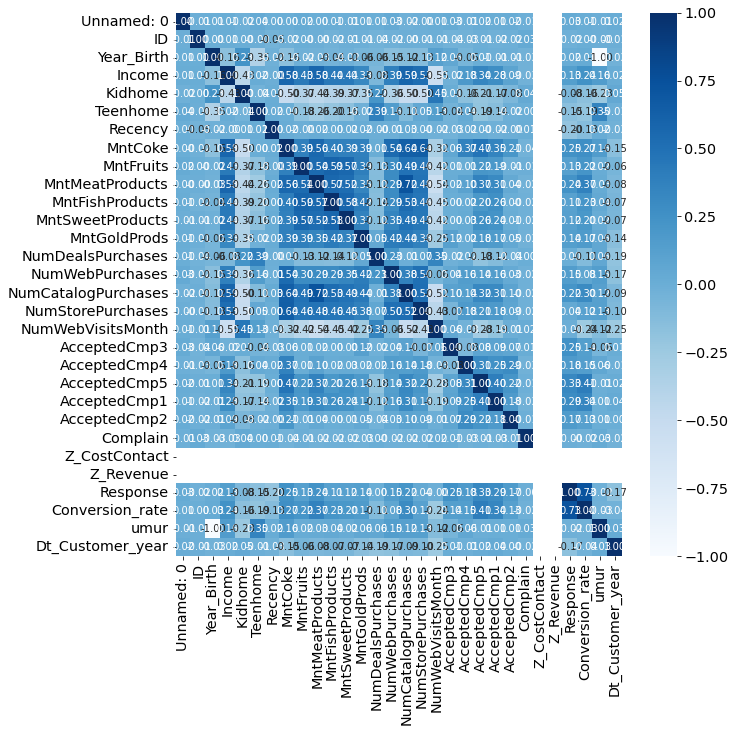

In [35]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1440x1440 with 0 Axes>

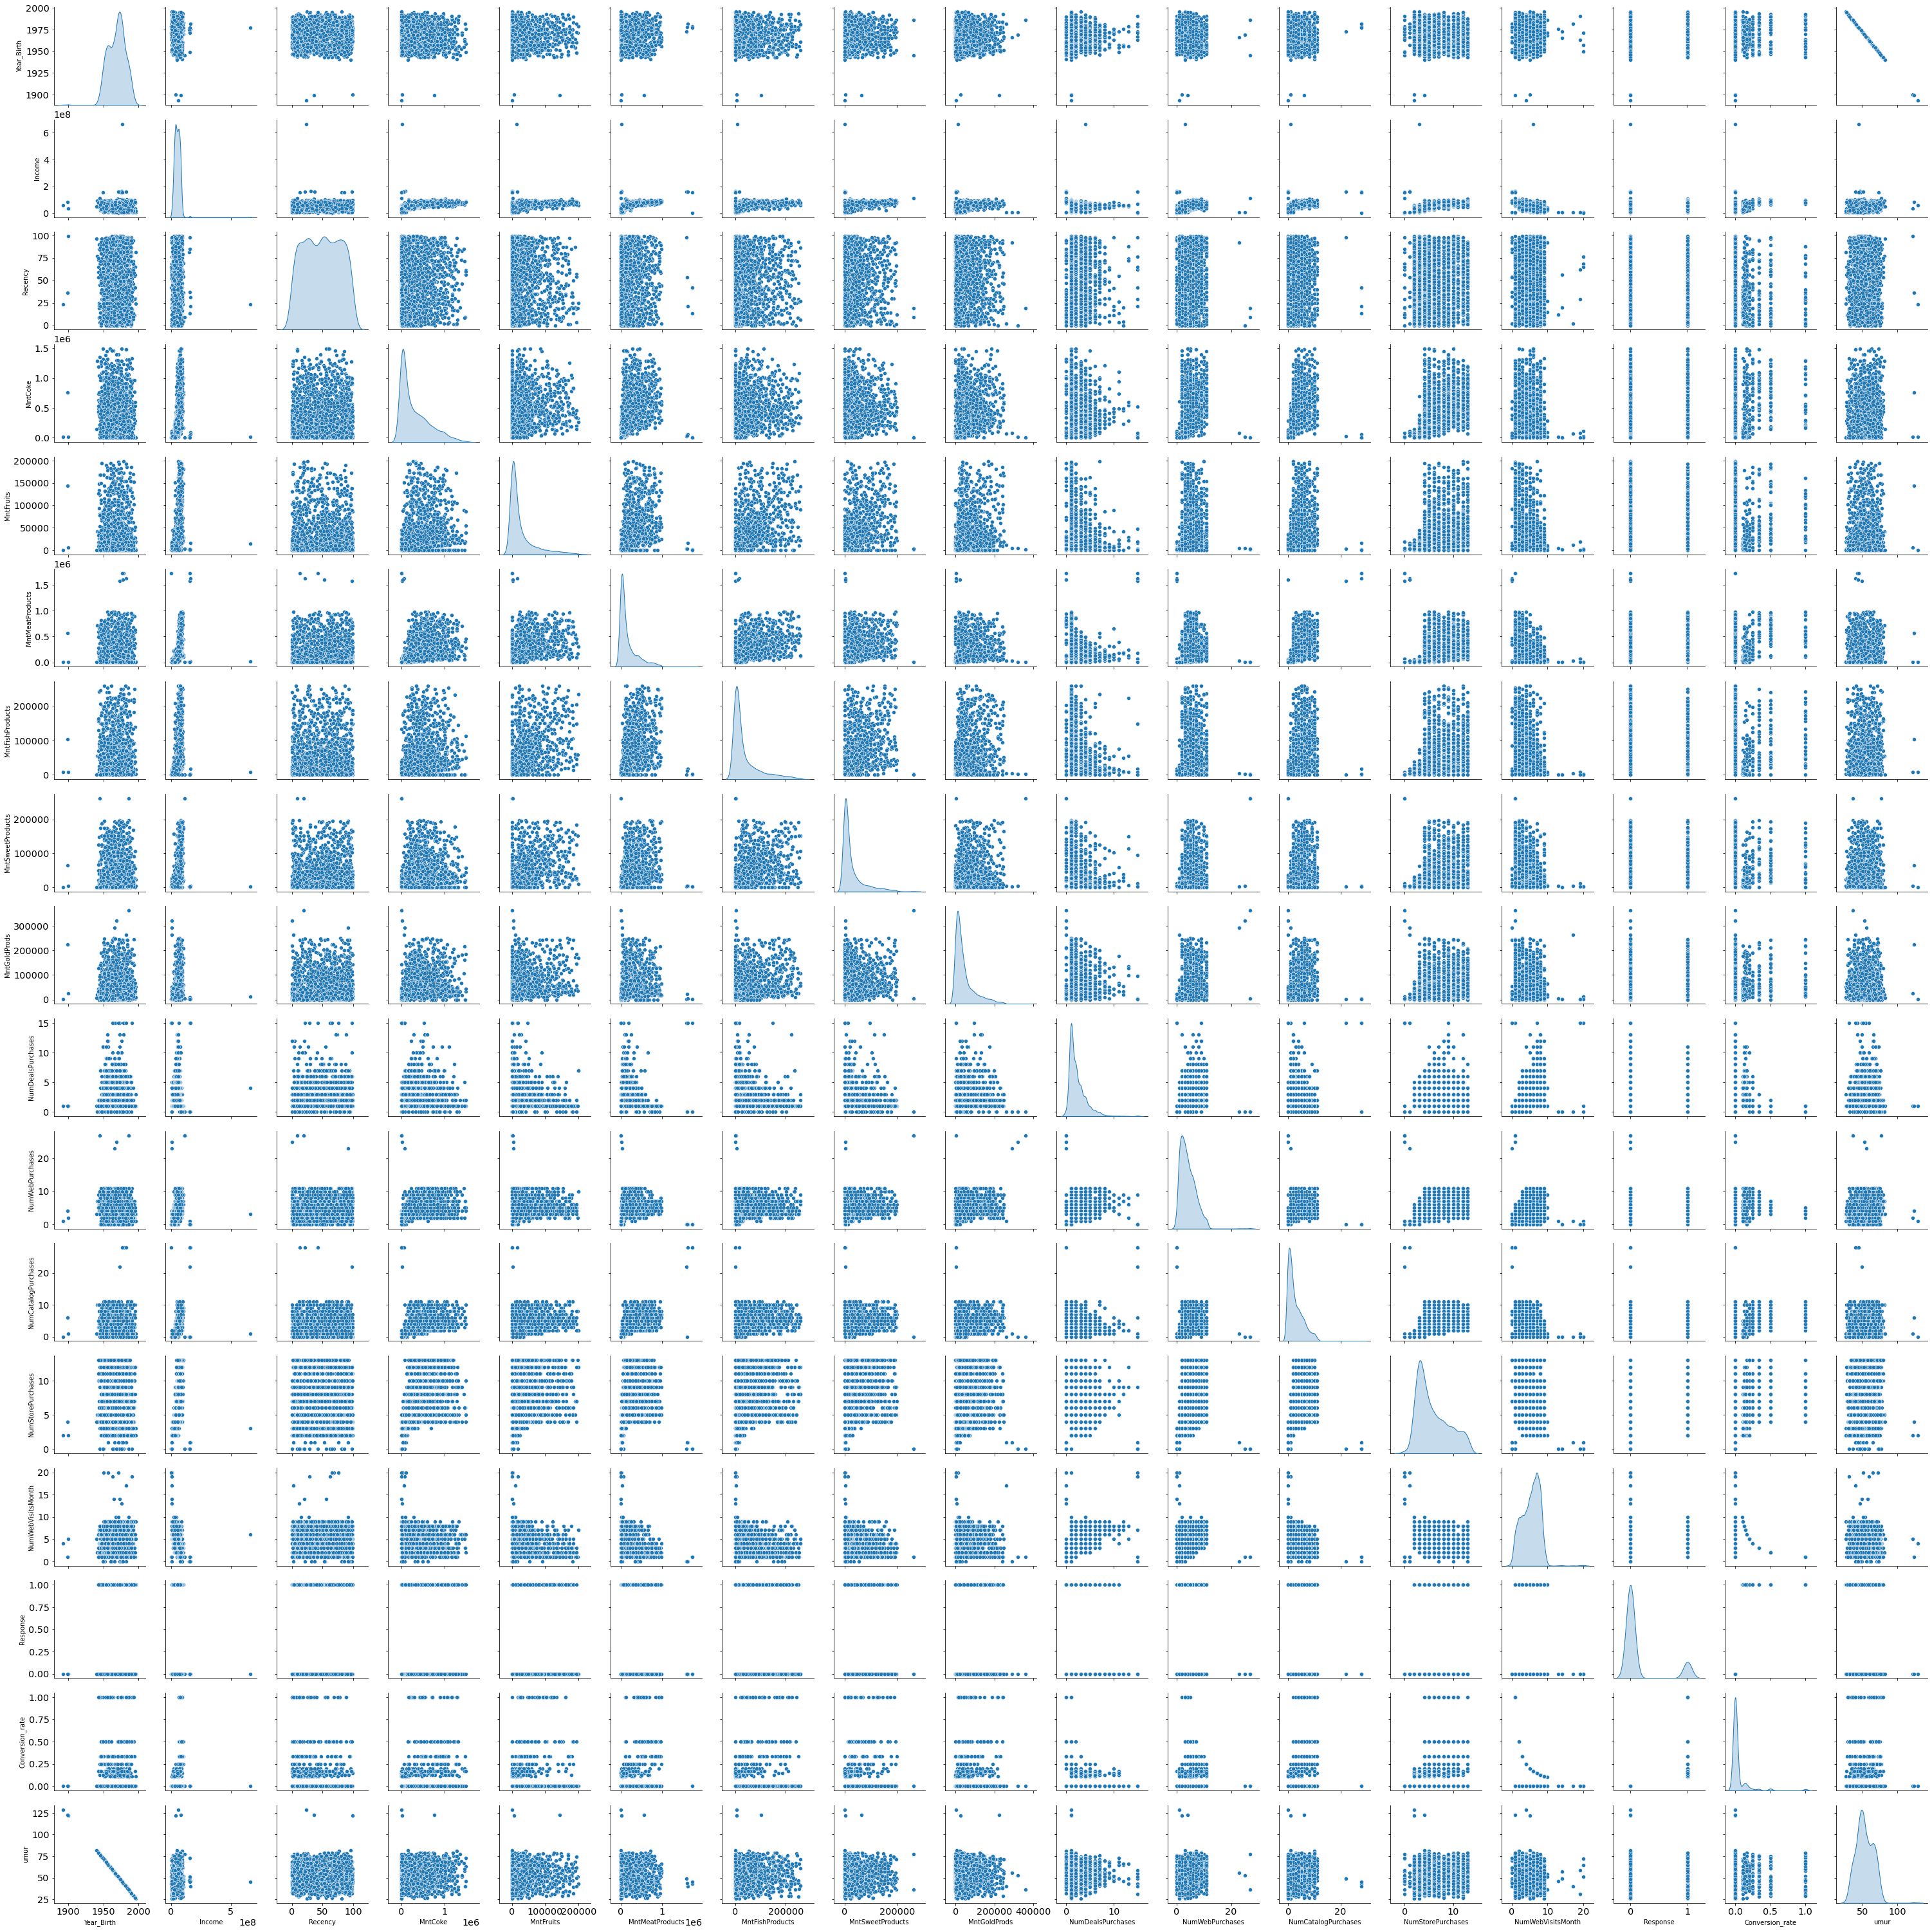

In [36]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[nums], diag_kind='kde')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

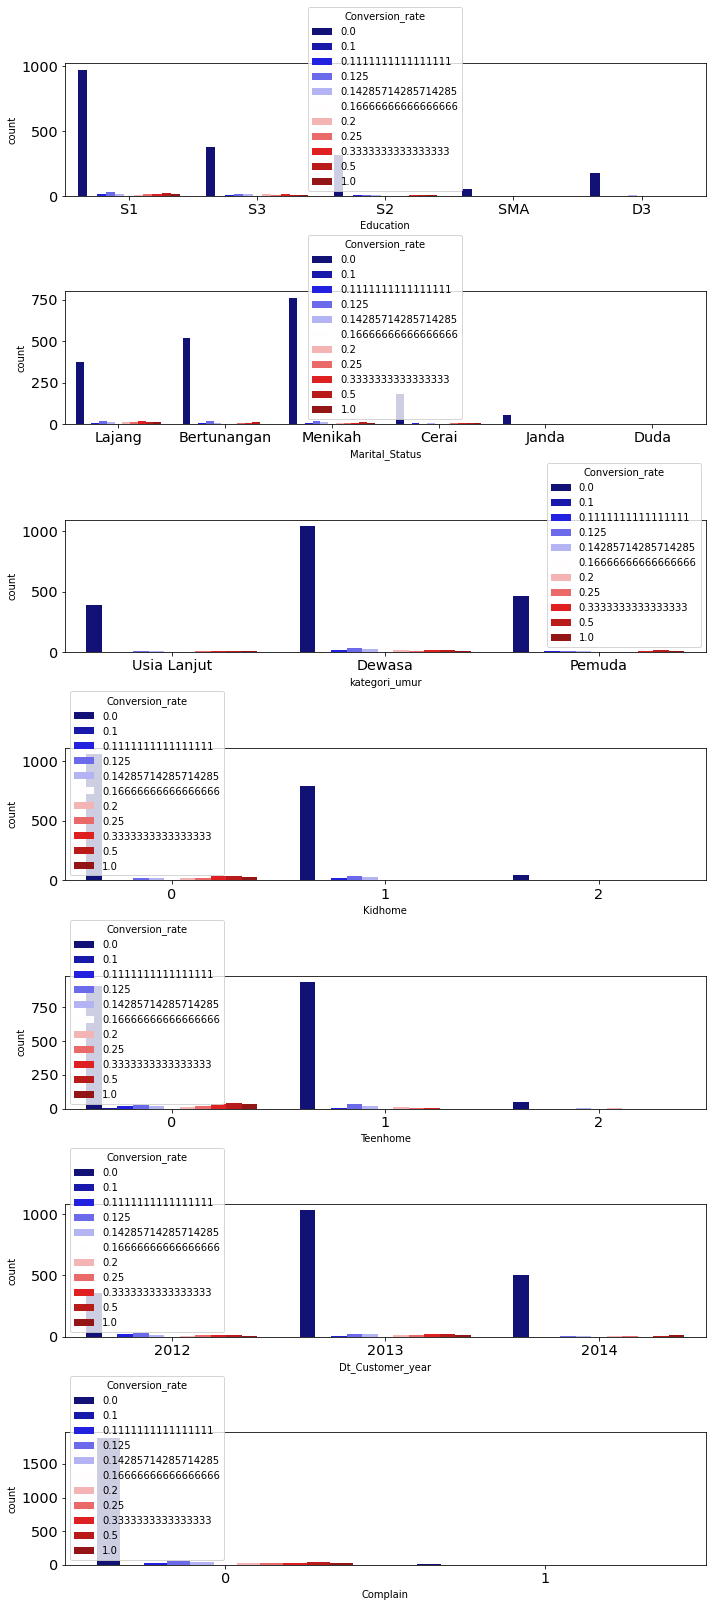

In [38]:
features = cats
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(8, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="Conversion_rate")
    #plt.xlabel(features[i])
    plt.tight_layout()
plt.savefig('cats.jpeg',dpi=200)

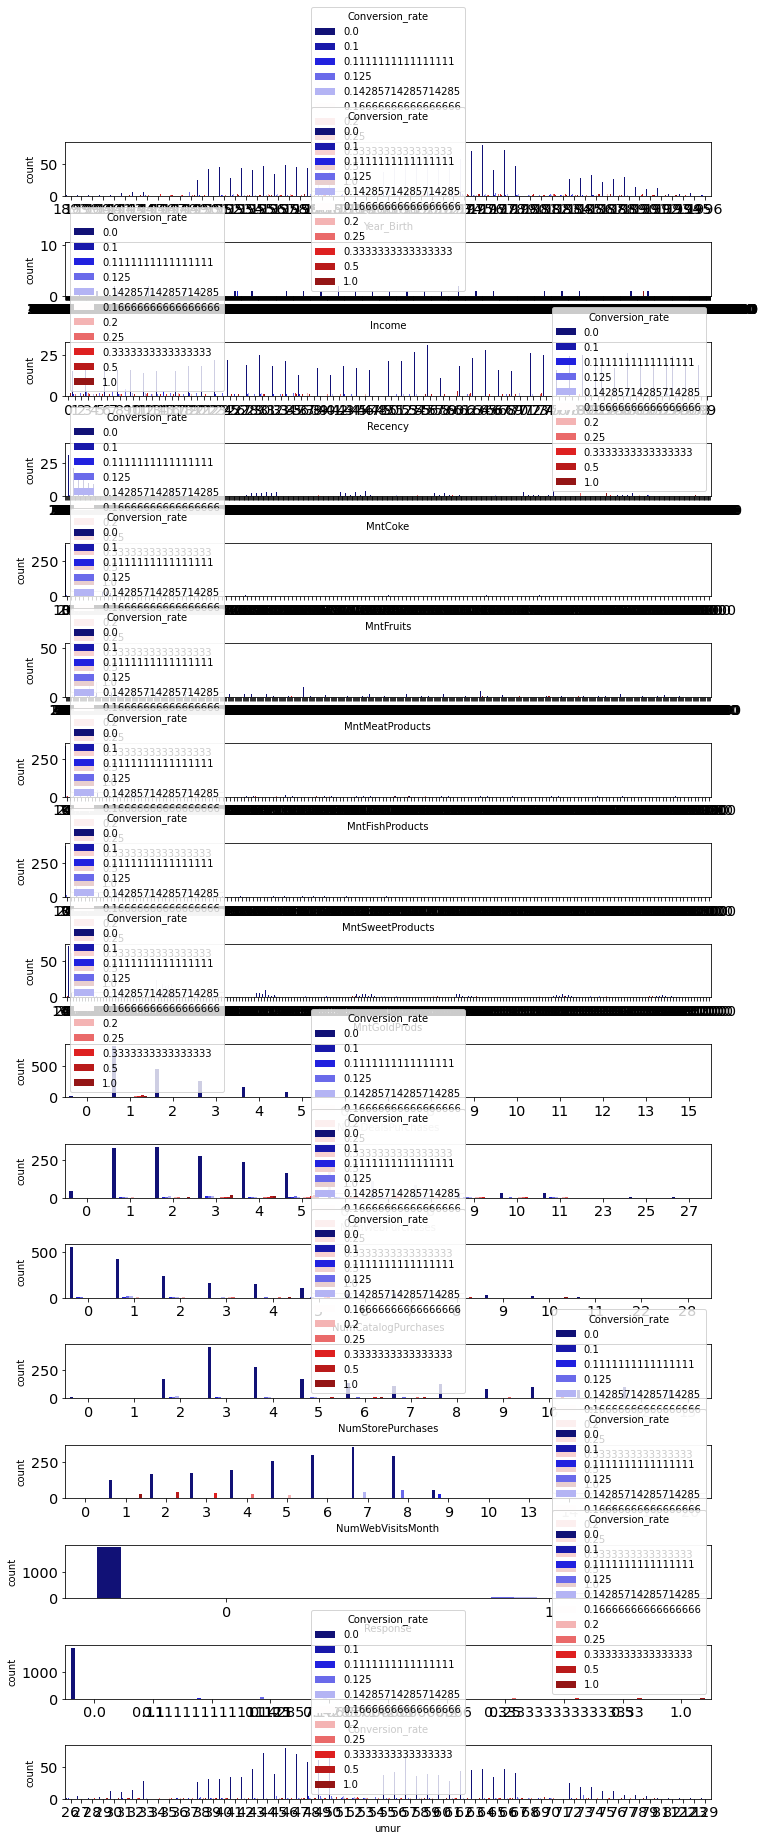

In [39]:
features = nums
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(17, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="Conversion_rate")
    #plt.xlabel(features[i])
    plt.tight_layout()

## Data Processing

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2240 non-null   int64         
 7   Teenhome             2240 non-null   int64         
 8   Dt_Customer          2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntCoke              2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [41]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_rate        11
umur                    0
kategori_umur           0
Dt_Customer_date        0
Dt_Customer_year        0
dtype: int64

In [42]:
df1=df.dropna(subset=['Conversion_rate','Income'])

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2206 non-null   int64         
 1   ID                   2206 non-null   int64         
 2   Year_Birth           2206 non-null   int64         
 3   Education            2206 non-null   object        
 4   Marital_Status       2206 non-null   object        
 5   Income               2206 non-null   float64       
 6   Kidhome              2206 non-null   int64         
 7   Teenhome             2206 non-null   int64         
 8   Dt_Customer          2206 non-null   object        
 9   Recency              2206 non-null   int64         
 10  MntCoke              2206 non-null   int64         
 11  MntFruits            2206 non-null   int64         
 12  MntMeatProducts      2206 non-null   int64         
 13  MntFishProducts      2206 non-nul

In [44]:
df1.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Conversion_rate        0
umur                   0
kategori_umur          0
Dt_Customer_date       0
Dt_Customer_year       0
dtype: int64

In [45]:
df1.duplicated().sum()

0

In [46]:
nums1 = ['Year_Birth','Income','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response','Conversion_rate','umur']

from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))

for col in nums1:
    zscore = abs(stats.zscore(df1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 2206
Jumlah baris setelah memfilter outlier: 1890


In [47]:
mapping_education={'SMA':0, 'D3':1, 'S1':2,'S2':3,'S3':4}
df2['Education']=df2['Education'].map(mapping_education)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1890 non-null   int64         
 1   ID                   1890 non-null   int64         
 2   Year_Birth           1890 non-null   int64         
 3   Education            1890 non-null   int64         
 4   Marital_Status       1890 non-null   object        
 5   Income               1890 non-null   float64       
 6   Kidhome              1890 non-null   int64         
 7   Teenhome             1890 non-null   int64         
 8   Dt_Customer          1890 non-null   object        
 9   Recency              1890 non-null   int64         
 10  MntCoke              1890 non-null   int64         
 11  MntFruits            1890 non-null   int64         
 12  MntMeatProducts      1890 non-null   int64         
 13  MntFishProducts      1890 non-nul

In [49]:
mapping_kat_usia={'Pemuda':0, 'Dewasa':1, 'Usia Lanjut':2,}
df2['kategori_umur']=df2['kategori_umur'].map(mapping_kat_usia)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1890 non-null   int64         
 1   ID                   1890 non-null   int64         
 2   Year_Birth           1890 non-null   int64         
 3   Education            1890 non-null   int64         
 4   Marital_Status       1890 non-null   object        
 5   Income               1890 non-null   float64       
 6   Kidhome              1890 non-null   int64         
 7   Teenhome             1890 non-null   int64         
 8   Dt_Customer          1890 non-null   object        
 9   Recency              1890 non-null   int64         
 10  MntCoke              1890 non-null   int64         
 11  MntFruits            1890 non-null   int64         
 12  MntMeatProducts      1890 non-null   int64         
 13  MntFishProducts      1890 non-nul

In [51]:
mapping_dt_year={'2012':0, '2013':1, '2014':2}
df2['Dt_Customer_year']=df2['Dt_Customer_year'].map(mapping_dt_year)

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           1890 non-null   int64         
 1   ID                   1890 non-null   int64         
 2   Year_Birth           1890 non-null   int64         
 3   Education            1890 non-null   int64         
 4   Marital_Status       1890 non-null   object        
 5   Income               1890 non-null   float64       
 6   Kidhome              1890 non-null   int64         
 7   Teenhome             1890 non-null   int64         
 8   Dt_Customer          1890 non-null   object        
 9   Recency              1890 non-null   int64         
 10  MntCoke              1890 non-null   int64         
 11  MntFruits            1890 non-null   int64         
 12  MntMeatProducts      1890 non-null   int64         
 13  MntFishProducts      1890 non-nul

In [53]:
cats_one = ['Marital_Status']
for cats_one in ['Marital_Status']:
    onehots = pd.get_dummies(df2[cats_one], prefix=cats_one)
    df2 = df2.join(onehots)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  1890 non-null   int64         
 1   ID                          1890 non-null   int64         
 2   Year_Birth                  1890 non-null   int64         
 3   Education                   1890 non-null   int64         
 4   Marital_Status              1890 non-null   object        
 5   Income                      1890 non-null   float64       
 6   Kidhome                     1890 non-null   int64         
 7   Teenhome                    1890 non-null   int64         
 8   Dt_Customer                 1890 non-null   object        
 9   Recency                     1890 non-null   int64         
 10  MntCoke                     1890 non-null   int64         
 11  MntFruits                   1890 non-null   int64       

In [55]:
df3 = df2.drop(columns=['Unnamed: 0','ID','Marital_Status','Dt_Customer','Dt_Customer_date','Dt_Customer_year','Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Z_CostContact','Z_Revenue'])

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year_Birth                  1890 non-null   int64  
 1   Education                   1890 non-null   int64  
 2   Income                      1890 non-null   float64
 3   Kidhome                     1890 non-null   int64  
 4   Teenhome                    1890 non-null   int64  
 5   Recency                     1890 non-null   int64  
 6   MntCoke                     1890 non-null   int64  
 7   MntFruits                   1890 non-null   int64  
 8   MntMeatProducts             1890 non-null   int64  
 9   MntFishProducts             1890 non-null   int64  
 10  MntSweetProducts            1890 non-null   int64  
 11  MntGoldProds                1890 non-null   int64  
 12  NumDealsPurchases           1890 non-null   int64  
 13  NumWebPurchases             1890 

In [57]:
df3['Income']=df3['Income'].astype(int)
df3['Conversion_rate']=df3['Conversion_rate'].astype(int)
df3['Marital_Status_Bertunangan']=df3['Marital_Status_Bertunangan'].astype(int)
df3['Marital_Status_Cerai']=df3['Marital_Status_Cerai'].astype(int)
df3['Marital_Status_Duda']=df3['Marital_Status_Duda'].astype(int)
df3['Marital_Status_Janda']=df3['Marital_Status_Janda'].astype(int)
df3['Marital_Status_Lajang']=df3['Marital_Status_Lajang'].astype(int)
df3['Marital_Status_Menikah']=df3['Marital_Status_Menikah'].astype(int)


In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year_Birth                  1890 non-null   int64
 1   Education                   1890 non-null   int64
 2   Income                      1890 non-null   int64
 3   Kidhome                     1890 non-null   int64
 4   Teenhome                    1890 non-null   int64
 5   Recency                     1890 non-null   int64
 6   MntCoke                     1890 non-null   int64
 7   MntFruits                   1890 non-null   int64
 8   MntMeatProducts             1890 non-null   int64
 9   MntFishProducts             1890 non-null   int64
 10  MntSweetProducts            1890 non-null   int64
 11  MntGoldProds                1890 non-null   int64
 12  NumDealsPurchases           1890 non-null   int64
 13  NumWebPurchases             1890 non-null   int64
 14  NumCatal

In [59]:
feats = ['Year_Birth','Education','Kidhome','Teenhome','Income','Recency','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Response','Conversion_rate','umur','Complain','kategori_umur','Marital_Status_Bertunangan','Marital_Status_Cerai','Marital_Status_Duda','Marital_Status_Janda','Marital_Status_Lajang','Marital_Status_Menikah']
X=df3[feats].values

from sklearn.preprocessing import StandardScaler
x_std= StandardScaler().fit_transform(X)
new_df3=pd.DataFrame(data=x_std, columns=feats)
new_df3.describe

<bound method NDFrame.describe of       Year_Birth  Education   Kidhome  Teenhome    Income   Recency   MntCoke  \
0      -1.035235  -0.462821 -0.900463 -0.989489  0.515060  0.301235  1.209945   
1      -1.294811  -0.462821  0.929510  0.851194 -0.102380 -0.389579 -0.799955   
2      -0.343034  -0.462821 -0.900463 -0.989489  1.220504 -0.804068  0.536758   
3       1.300945  -0.462821  0.929510 -0.989489 -1.133611 -0.804068 -0.799955   
4       1.041370   1.500661  0.929510 -0.989489  0.523175  1.544702 -0.278154   
...          ...        ...       ...       ...       ...       ...       ...   
1885    0.435693  -0.462821  0.929510 -0.989489 -0.726573  1.095673 -0.825723   
1886   -1.987013   1.500661  2.759483  0.851194  0.822681  0.232154  0.472338   
1887    1.041370  -0.462821 -0.900463 -0.989489  0.454489  1.441080  2.089277   
1888   -1.121760   0.518920 -0.900463  0.851194  1.096535 -1.425802  0.543199   
1889   -1.294811   1.500661  0.929510  0.851194  0.239217 -0.320498 -0.5648

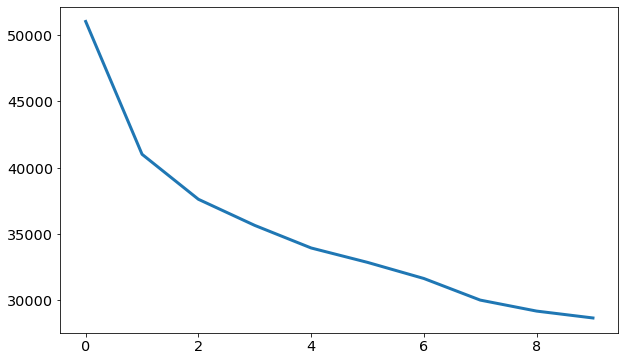

In [60]:
from sklearn.cluster import KMeans
inertia=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
  kmeans.fit(new_df3.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(inertia) 
plt.savefig('ELBOW.jpeg',dpi=200) 

In [61]:
inertias = []
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(new_df3.values)
    kmeanModel.fit(new_df3.values)
  
    inertias.append(kmeanModel.inertia_)
  
    mapping2[k] = kmeanModel.inertia_

In [62]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 51030.00000000003
2 : 41001.47858582884
3 : 37603.63777927488
4 : 35630.8879309872
5 : 33743.30095920867
6 : 32659.51838221061
7 : 31248.736029106338
8 : 30484.185484320275
9 : 29084.15808471101


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5977b43d0>,
                     estimator=KMeans(max_iter=100, n_clusters=9,
                                      random_state=0))

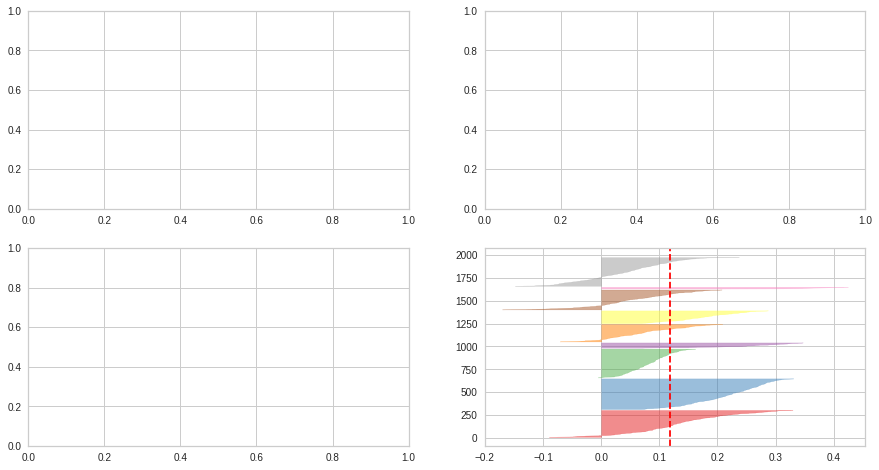

In [63]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

K = range(1, 10)

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in K:
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
  q,mod= divmod(1,2)

visualizer= SilhouetteVisualizer(kmeans, color='red', ax=ax[q-1][mod])
visualizer.fit(new_df3.values)

In [64]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df3.values)

KMeans(algorithm='auto',copy_x=True, init='k-means++', max_iter=300, n_clusters=5, 
       n_init=10, random_state=0, tol=0.0001, verbose=0)

KMeans(n_clusters=5, random_state=0)

In [65]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df3.values)

KMeans(algorithm='auto',copy_x=True, init='k-means++', max_iter=300, n_clusters=9, 
       n_init=10, random_state=0, tol=0.0001, verbose=0)

KMeans(n_clusters=9, random_state=0)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb595be33d0>,
                     estimator=KMeans(max_iter=100, n_clusters=5,
                                      random_state=0))

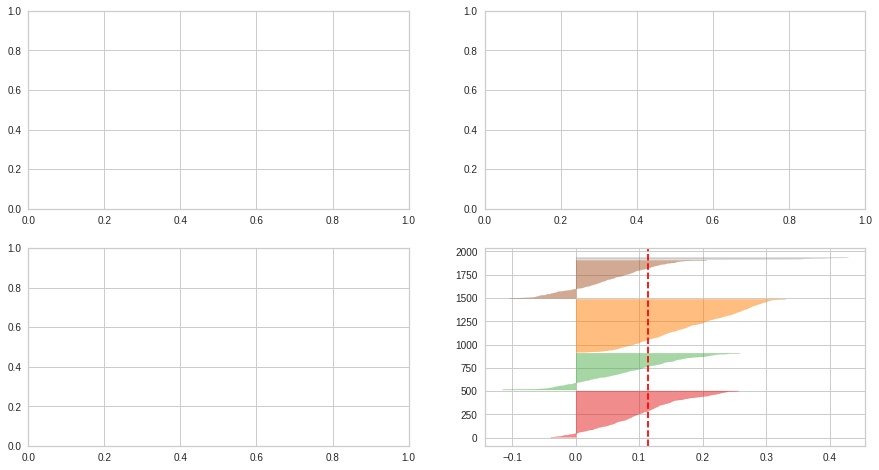

In [66]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

K = range(1, 6)

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in K:
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
  q,mod= divmod(1,2)

visualizer= SilhouetteVisualizer(kmeans, color='red', ax=ax[q-1][mod])
visualizer.fit(new_df3.values)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb598799650>,
                     estimator=KMeans(max_iter=100, n_clusters=2,
                                      random_state=0))

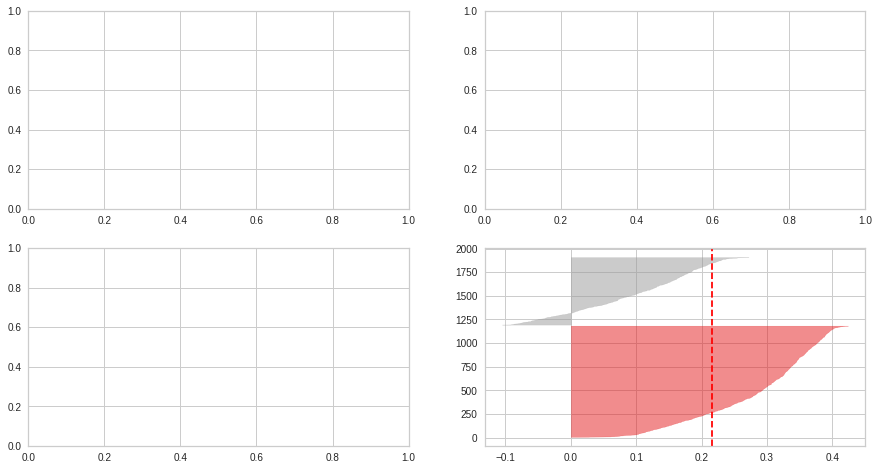

In [67]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

K = range(1, 3)

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i in K:
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
  q,mod= divmod(1,2)

visualizer= SilhouetteVisualizer(kmeans, color='red', ax=ax[q-1][mod])
visualizer.fit(new_df3.values)

CPU times: user 202 ms, sys: 47.3 ms, total: 249 ms
Wall time: 138 ms


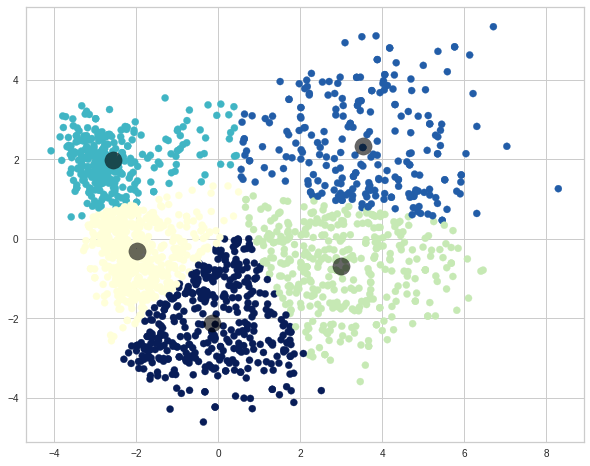

In [68]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_cluster=5
sklearn_pca=PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(new_df3)
kmeans= KMeans(n_clusters=n_cluster, max_iter=300, random_state=0,algorithm='auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=new_df3.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='YlGnBu')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [69]:
data_labeling=new_df3.assign(K_Cluster = 'cluster_labels')

In [70]:
cluster = []
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low Value'
    cluster.append(cluster_name)
data_labeling['cluster'] = cluster

In [71]:
df_cluster=data_labeling.groupby(data_labeling['cluster']).mean()
df_cluster['count']=pd.value_counts(data_labeling['cluster'])
df_cluster.head()

Year_Birth     Education       Kidhome      Teenhome  \
cluster                                                             
Low Value -5.288186e-15 -9.116752e-17 -1.022110e-17 -1.503794e-17   

                 Income       Recency       MntCoke     MntFruits  \
cluster                                                             
Low Value  1.544767e-16  1.098475e-17  1.374562e-17 -3.518643e-17   

           MntMeatProducts  MntFishProducts  ...          umur      Complain  \
cluster                                      ...                               
Low Value    -2.646325e-17    -1.503794e-17  ... -2.417819e-16  1.753447e-17   

           kategori_umur  Marital_Status_Bertunangan  Marital_Status_Cerai  \
cluster                                                                      
Low Value   9.551443e-17                8.394226e-17         -7.401487e-18   

           Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Lajang  \
cluster                                                                       
Low Value        -2.004569e-18         -3.759485e-18           4.423270e-17   

           Marital_Status_Menikah  count  
cluster                                   
Low Value            1.193637e-16   1890  

[1 rows x 29 columns]

In [72]:
pca=PCA(n_components=28)
pca.fit(new_df3.values)
X_reduced= pca.transform(new_df3)

In [73]:
x_reduceddf=pd.DataFrame(data=X_reduced, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pca23','pca24','pca25','pca26','pc27','pca28'])
x_reduceddf['cluster']=5
x_reduceddf.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  5.582778  0.742285  0.787103  2.001128  2.608076 -1.107730  1.623552   
1 -1.607816 -2.384282 -1.434317  0.854377  1.458303 -0.959960 -0.772447   
2  2.702360  0.561304 -0.903846  1.010837 -1.301935  0.593178  0.928931   
3 -2.853006  1.828565 -0.354135  1.116442 -1.505530  0.968219  0.608747   
4  0.063930  1.877307  1.314275 -1.503906 -0.611555  0.381666 -1.351915   

        pc8       pc9      pc10  ...      pc20      pc21      pc22     pca23  \
0  1.933352  0.355019 -0.394203  ... -0.134810 -0.081740 -0.308607  0.274535   
1  0.765234  0.511975  0.294223  ... -0.110804 -0.162346 -0.252401 -0.078501   
2  0.369916  0.051156  0.052624  ...  1.805521 -0.660750 -0.352993 -0.124621   
3  0.038332 -0.112517 -0.047454  ...  0.078958 -0.002430 -0.037575  0.030854   
4 -0.478313 -0.153426 -0.107086  ...  0.154732 -0.698319 -0.369241 -0.221752   

      pca24     pca25         pca26          pc27         pca28  cluster  
0 -0.436576  0.041141 -1.092326e-15 -2.055000e-16 -1.969669e-16        5  
1 -0.226277  0.224191 -1.360784e-15 -1.499888e-16  1.916112e-16        5  
2  0.199923  0.219961  1.103628e-16  4.051227e-16 -1.969669e-16        5  
3  0.060088 -0.248382  9.805690e-16  6.271673e-16  5.283333e-17        5  
4  0.433478  0.501055  1.491096e-15 -8.074742e-16 -2.194136e-16        5  

[5 rows x 29 columns]

In [82]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(new_df3):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(new_df3)

        silhouette_avg = silhouette_score(new_df3, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

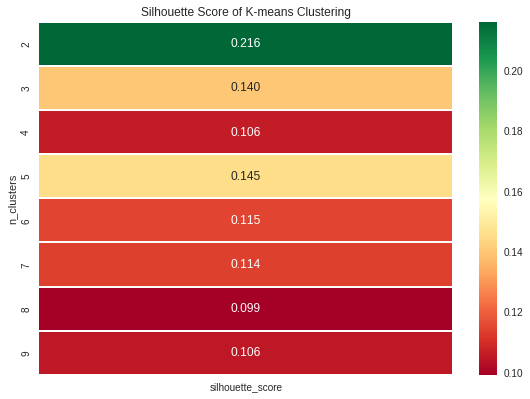

In [84]:
visualize_silhouette_layer(new_df3)

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(new_df3.values)
new_df3['cluster'] = kmeans.labels_
new_df3['cluster'] = kmeans.labels_

In [96]:
new_df3.tail()

Year_Birth  Education   Kidhome  Teenhome    Income   Recency   MntCoke  \
1885    0.435693  -0.462821  0.929510 -0.989489 -0.726573  1.095673 -0.825723   
1886   -1.987013   1.500661  2.759483  0.851194  0.822681  0.232154  0.472338   
1887    1.041370  -0.462821 -0.900463 -0.989489  0.454489  1.441080  2.089277   
1888   -1.121760   0.518920 -0.900463  0.851194  1.096535 -1.425802  0.543199   
1889   -1.294811   1.500661  0.929510  0.851194  0.239217 -0.320498 -0.564823   

      MntFruits  MntMeatProducts  MntFishProducts  ...  Complain  \
1885  -0.551849        -0.681531        -0.521234  ... -0.103418   
1886  -0.654895        -0.544578        -0.668764  ... -0.103418   
1887   0.993838         0.568913         0.118063  ... -0.103418   
1888   0.375563         0.551049         1.298304  ... -0.103418   
1889  -0.551849        -0.359989        -0.619587  ... -0.103418   

      kategori_umur  Marital_Status_Bertunangan  Marital_Status_Cerai  \
1885       0.067413                   -0.599760             -0.340151   
1886       1.566363                    1.667333             -0.340151   
1887      -1.431537                   -0.599760              2.939874   
1888       1.566363                    1.667333             -0.340151   
1889       1.566363                   -0.599760             -0.340151   

      Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Lajang  \
1885            -0.039873             -0.177931              -0.509902   
1886            -0.039873             -0.177931              -0.509902   
1887            -0.039873             -0.177931              -0.509902   
1888            -0.039873             -0.177931              -0.509902   
1889            -0.039873             -0.177931              -0.509902   

      Marital_Status_Menikah  total_amount_spent  cluster  
1885                1.242474           -3.805459        0  
1886               -0.804846           -2.712576        0  
1887               -0.804846            3.241234        1  
1888               -0.804846            3.731020        1  
1889                1.242474           -3.069040        0  

[5 rows x 30 columns]

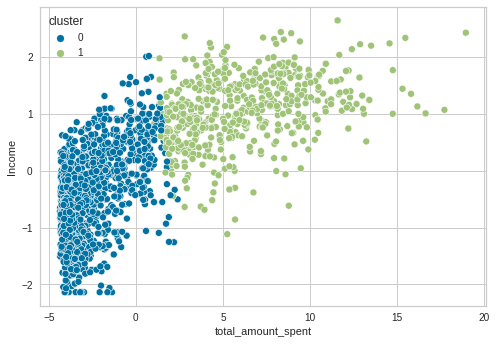

In [97]:
sns.scatterplot(data=new_df3, x='total_amount_spent', y='Income', hue='cluster')

In [88]:
new_df3['total_amount_spent'] = new_df3['MntCoke'] \
                              + new_df3['MntFruits'] \
                              + new_df3['MntMeatProducts'] \
                              + new_df3['MntFishProducts'] \
                              + new_df3['MntSweetProducts'] \
                              + new_df3['MntGoldProds']

In [89]:
nums

['Year_Birth',
 'Income',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response',
 'Conversion_rate',
 'umur']

In [132]:
num=['Year_Birth','Income','Recency','total_amount_spent','Response','Conversion_rate','umur']

In [133]:
new_df3[num+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

Income                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
0        1326.0 -0.457693  0.756063 -2.135943 -1.022663 -0.503527  0.072280   
1         564.0  1.076064  0.598624 -1.115235  0.743093  1.100854  1.504553   

                  total_amount_spent                                          \
              max              count      mean       std       min       25%   
cluster                                                                        
0        2.017459             1326.0 -2.625823  1.563953 -4.361222 -3.865261   
1        2.642595              564.0  6.173478  3.295776  1.050747  3.436033   

                                        
              50%       75%        max  
cluster                                 
0       -3.178332 -1.812194   2.398928  
1        5.697931  8.332310  18.956894

In [127]:
a=new_df3[num+['cluster']].groupby('cluster')['Year_Birth','Recency'].describe()

In [128]:
a

Year_Birth                                                    \
             count      mean       std       min       25%       50%   
cluster                                                                
0           1326.0  0.084633  0.961689 -2.506164 -0.602609  0.176118   
1            564.0 -0.198978  1.060138 -2.419639 -1.035235 -0.169983   

                            Recency                                          \
              75%       max   count      mean       std       min       25%   
cluster                                                                       
0        0.781794  2.339248  1326.0 -0.010308  1.000749 -1.702127 -0.873150   
1        0.608744  2.252723   564.0  0.024236  0.999593 -1.702127 -0.847244   

                                       
              50%       75%       max  
cluster                                
0       -0.009631  0.853887  1.717406  
1        0.024910  0.853887  1.717406

In [129]:
b=new_df3[num+['cluster']].groupby('cluster')['Response','Conversion_rate','umur'].describe()

In [130]:
b

Response                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         1326.0 -0.047890  0.939493 -0.360149 -0.360149 -0.360149 -0.360149   
1          564.0  0.112593  1.123227 -0.360149 -0.360149 -0.360149 -0.360149   

                  Conversion_rate       ...              umur            \
              max           count mean  ...  75%  max   count      mean   
cluster                                 ...                               
0        2.776631          1326.0  0.0  ...  0.0  0.0  1326.0 -0.084633   
1        2.776631           564.0  0.0  ...  0.0  0.0   564.0  0.198978   

                                                                     
              std       min       25%       50%       75%       max  
cluster                                                              
0        0.961689 -2.339248 -0.781794 -0.176118  0.602609  2.506164  
1        1.060138 -2.252723 -0.608744  0.169983  1.035235  2.419639  

[2 rows x 24 columns]

In [99]:
map_cluster = {
    0 : 'No Churn',
    1 : 'Churn'
}

new_df3['cluster_mapped'] = new_df3['cluster'].map(map_cluster)

In [ ]:
new_df3[num+['cluster']].groupby('cluster')['Income','total_amount_spent'].describe()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

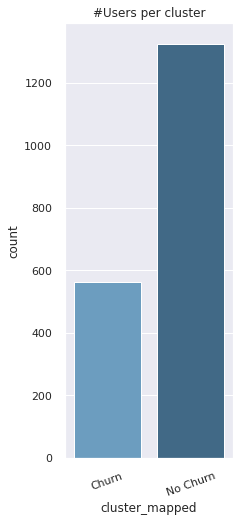

In [101]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=new_df3['cluster_mapped'], palette='Blues_d')
plt.title('#Users per cluster')
plt.xticks(rotation=20)

In [ ]:
num=['Year_Birth','Income','Recency','total_amount_spent','Response','Conversion_rate','umur']

In [103]:
color=['#CDFCF6','#BCCEF8','#98A8F8','#3F0071']

Text(0.5, 1.0, 'Total Income per Cluster')

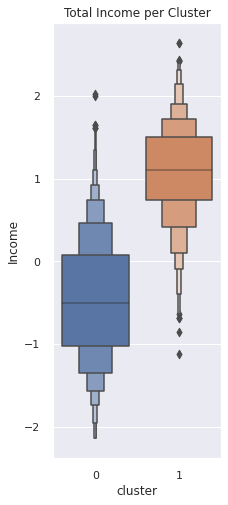

In [115]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['Income'])
plt.title('Total Income per Cluster')

Text(0.5, 1.0, 'Year_Birth per Cluster')

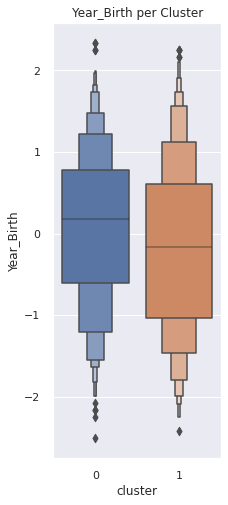

In [116]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['Year_Birth'])
plt.title('Year Birth per Cluster')

Text(0.5, 1.0, 'Recency per Cluster')

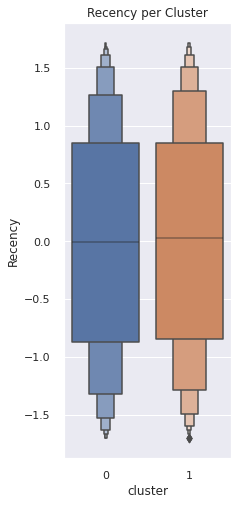

In [117]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['Recency'])
plt.title('Recency per Cluster')

Text(0.5, 1.0, 'total_amount_spent per Cluster')

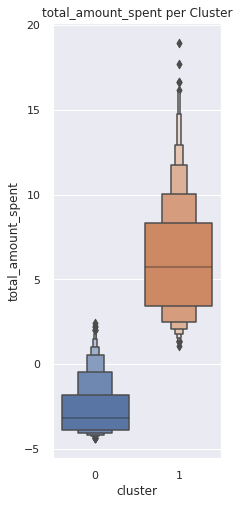

In [118]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['total_amount_spent'])
plt.title('total amount spent per Cluster')

Text(0.5, 1.0, 'Response per Cluster')

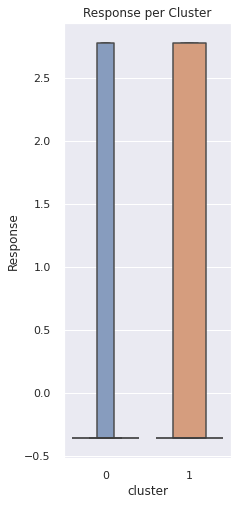

In [119]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['Response'])
plt.title('Response per Cluster')

Text(0.5, 1.0, 'Conversion_rate per Cluster')

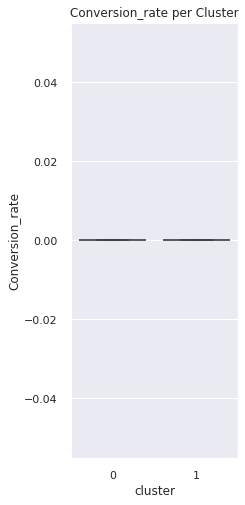

In [120]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['Conversion_rate'])
plt.title('Conversion_rate per Cluster')

Text(0.5, 1.0, 'umur per Cluster')

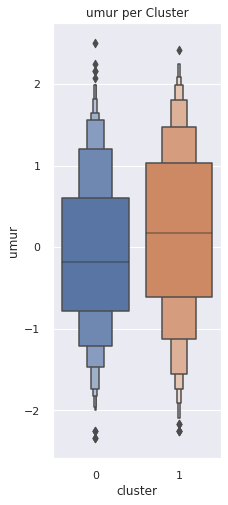

In [121]:
sns.boxenplot(x=new_df3['cluster'], y=new_df3['umur'])
plt.title('umur per Cluster')